In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('diabetes_prediction_dataset.csv');df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [26]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [27]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [28]:
df.shape

(100000, 9)

In [29]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [30]:
df.duplicated().sum()

3854

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

In [33]:
df.shape

(96146, 9)

In [34]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [35]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

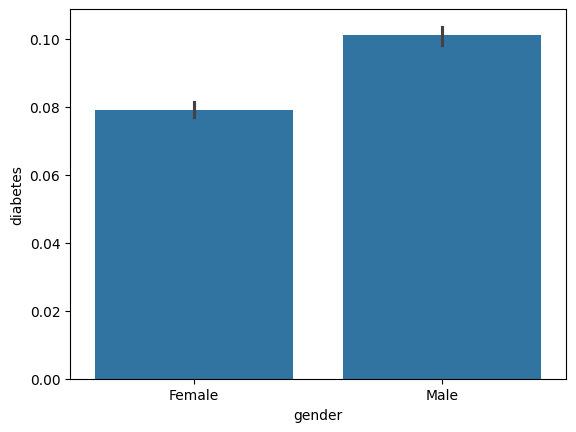

In [36]:
sns.barplot(x='gender', y='diabetes', data=df);

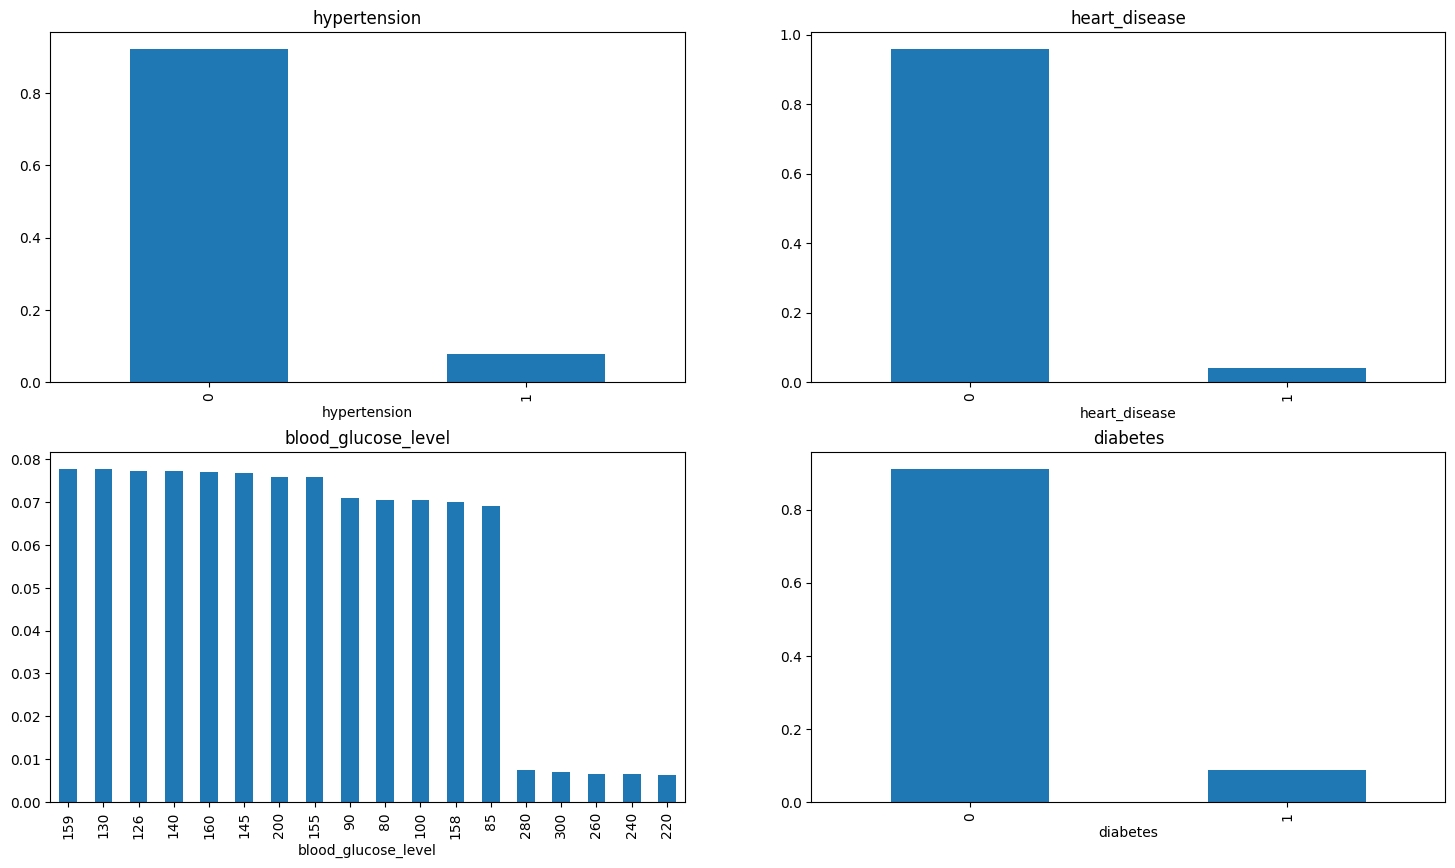

In [42]:
plt.figure(1)
plt.subplot(221)
df['hypertension'].value_counts(normalize=True).plot.bar(figsize=(18,10), title= 'hypertension')

plt.subplot(222)
df['heart_disease'].value_counts(normalize=True).plot.bar(title= 'heart_disease')

plt.subplot(223)
df['blood_glucose_level'].value_counts(normalize=True).plot.bar(title= 'blood_glucose_level')

plt.subplot(224)
df['diabetes'].value_counts(normalize=True).plot.bar(title= 'diabetes')

plt.show()

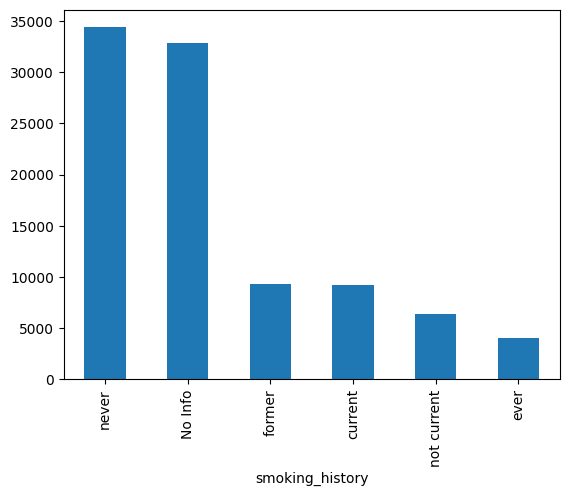

In [45]:
df['smoking_history'].value_counts().plot.bar();

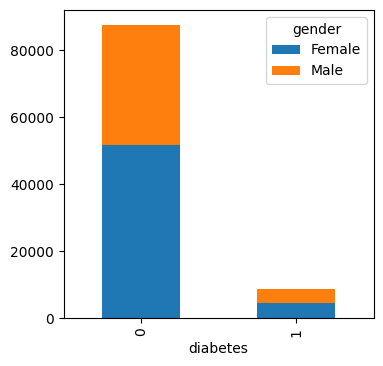

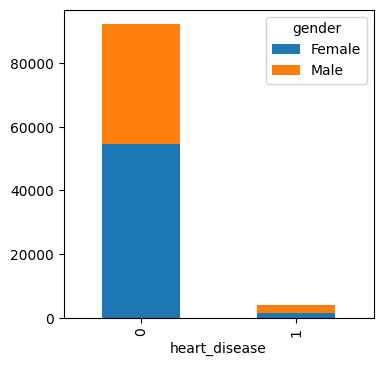

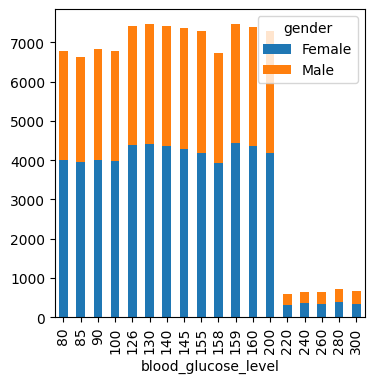

In [48]:
diabetes = pd.crosstab(df['diabetes'],df['gender'])
heart_disease = pd.crosstab(df['heart_disease'],df['gender'])
blood_glucose_level = pd.crosstab(df['blood_glucose_level'],df['gender'])

diabetes.plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
heart_disease.plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
blood_glucose_level.plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

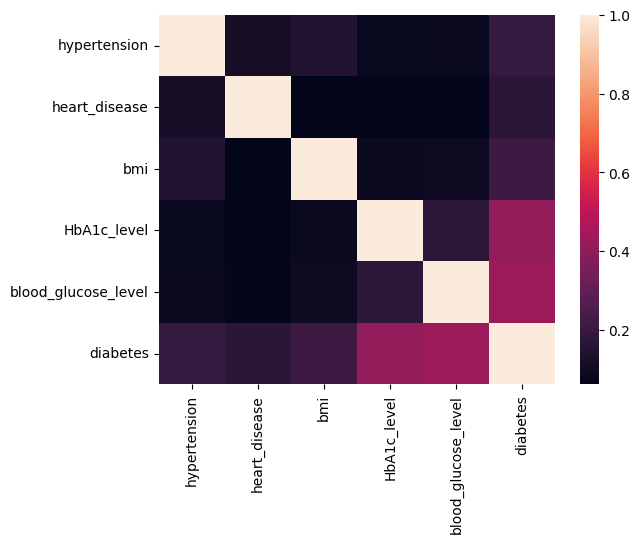

In [53]:
sns.heatmap(df[['hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']].corr());

In [57]:
df['age'].unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [58]:
df.drop(df[df['age'] <= 2].index, inplace = True)

In [62]:
df['age'].unique()

array([80., 54., 28., 36., 76., 20., 44., 79., 42., 32., 53., 78., 67.,
       15., 37., 40.,  5., 69., 72.,  4., 30., 45., 43., 50., 41., 26.,
       34., 73., 77., 66., 29., 60., 38.,  3., 57., 74., 19., 46., 21.,
       59., 27., 13., 56.,  7., 11.,  6., 55.,  9., 62., 47., 12., 68.,
       75., 22., 58., 18., 24., 17., 25., 33., 16., 61., 31.,  8., 49.,
       39., 65., 14., 70., 48., 51., 71., 64., 63., 52., 10., 35., 23.])

In [66]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

In [69]:
x.shape, y.shape

((92873, 8), (92873,))

In [70]:
y.value_counts()

,count
diabetes,
0,84391
1,8482


In [72]:
from sklearn.preprocessing import LabelEncoder

X = x.copy()
for col in x[['gender','smoking_history']]:
    lb = LabelEncoder()
    X[col] = lb.fit_transform(x[col])

X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [81]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn.score(x_test, y_test), knn.score(x_train, y_train)

(0.9488559892328399, 0.9522328999434709)

In [85]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test, y_test), gnb.score(x_train, y_train)

(0.8994347240915208, 0.9019892863872513)

In [83]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test), dtc.score(x_train, y_train)

(0.9472409152086138, 0.9993539530000808)

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test), rfc.score(x_train, y_train)

(0.9676985195154778, 0.9993404936875825)